In [ ]:
# Setup
# This cell installs all the dependencies used in this week - imports happen as we go
%%capture
!pip install transformers[sentencepiece] datasets sacremoses evaluate

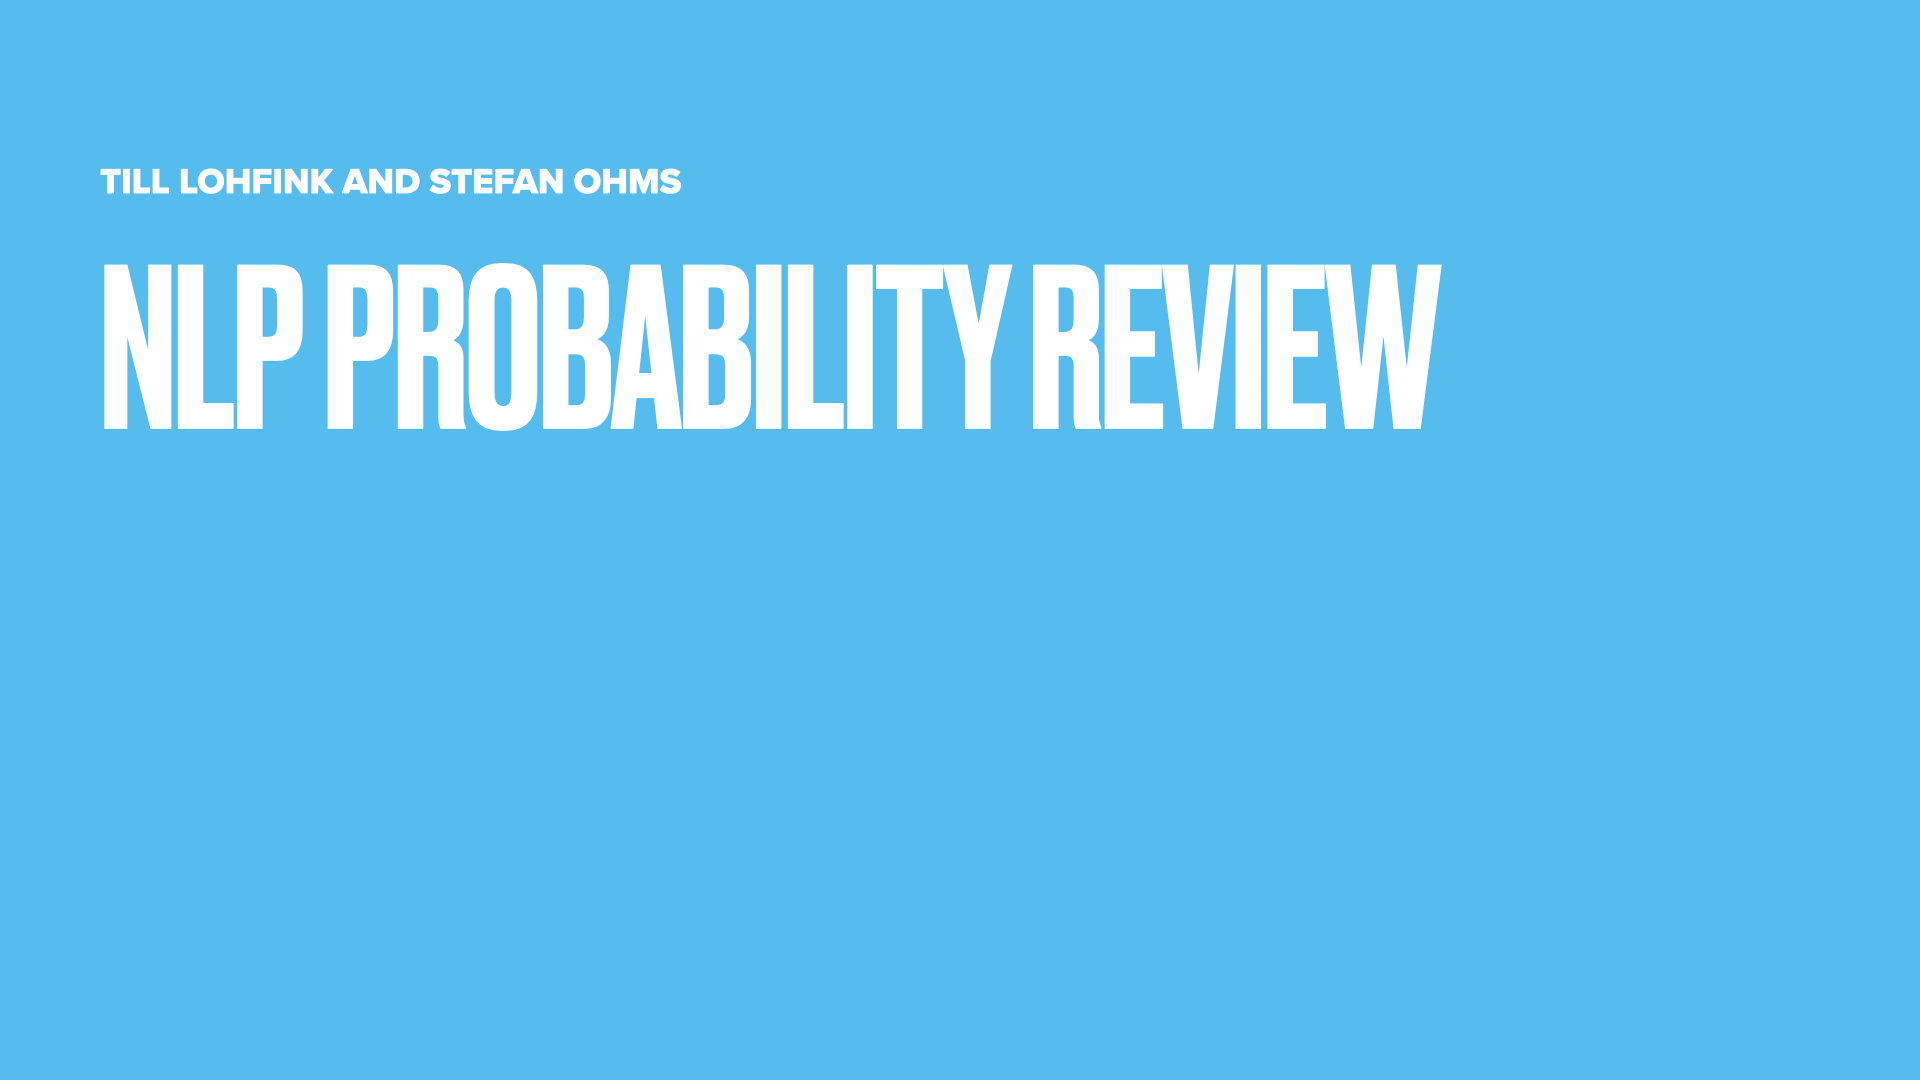

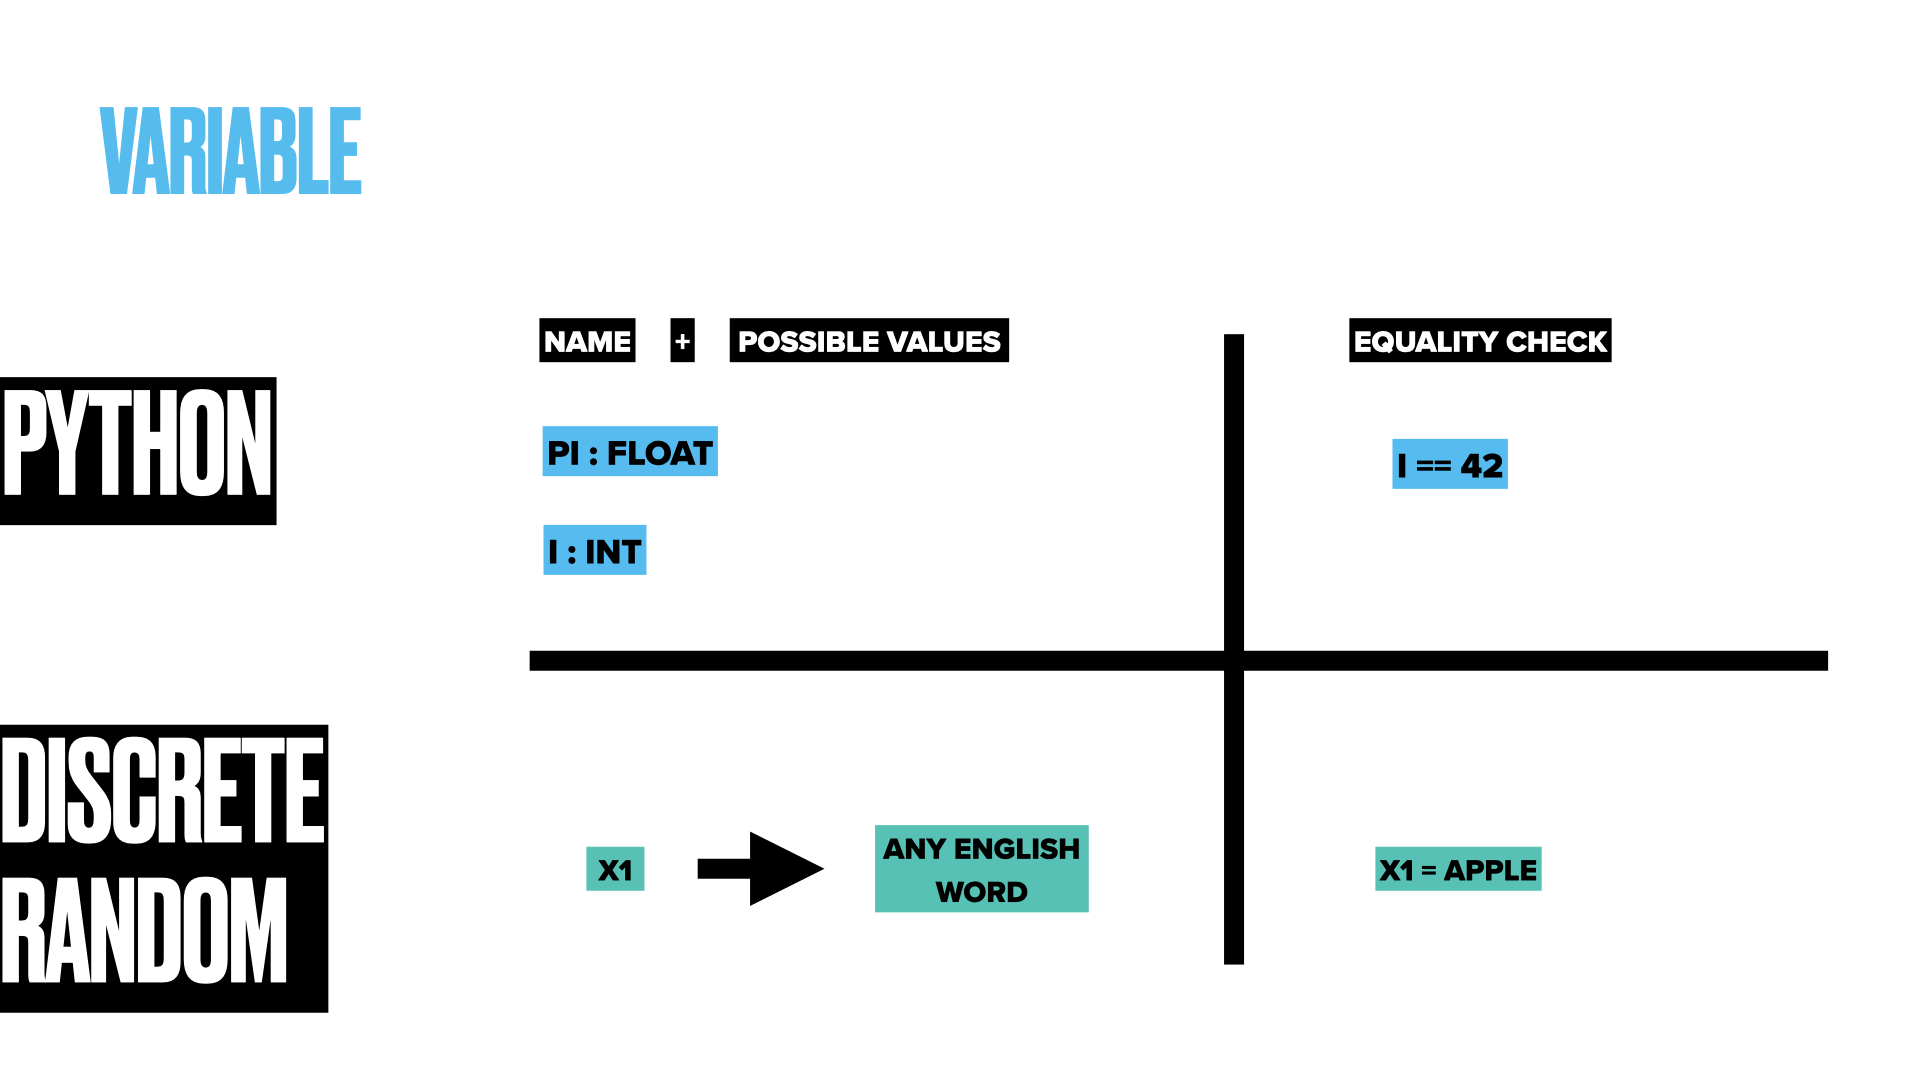

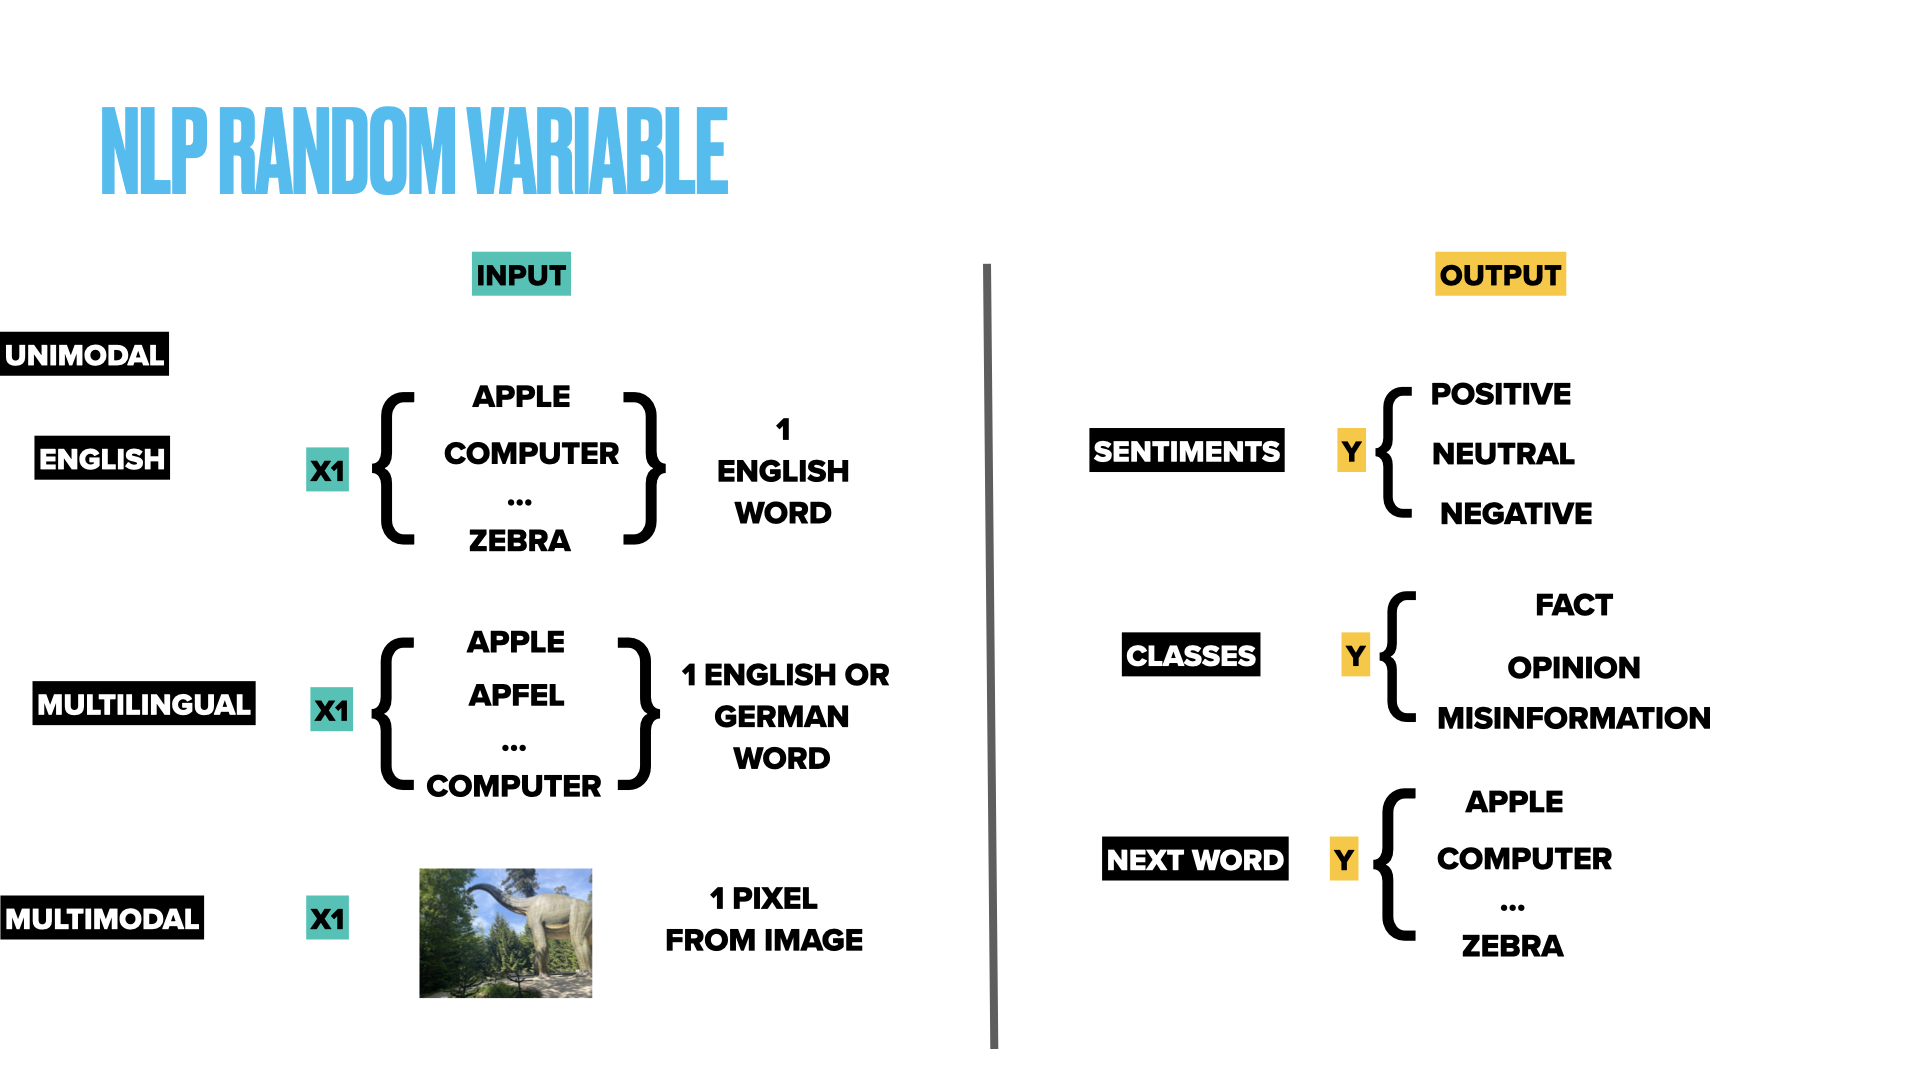

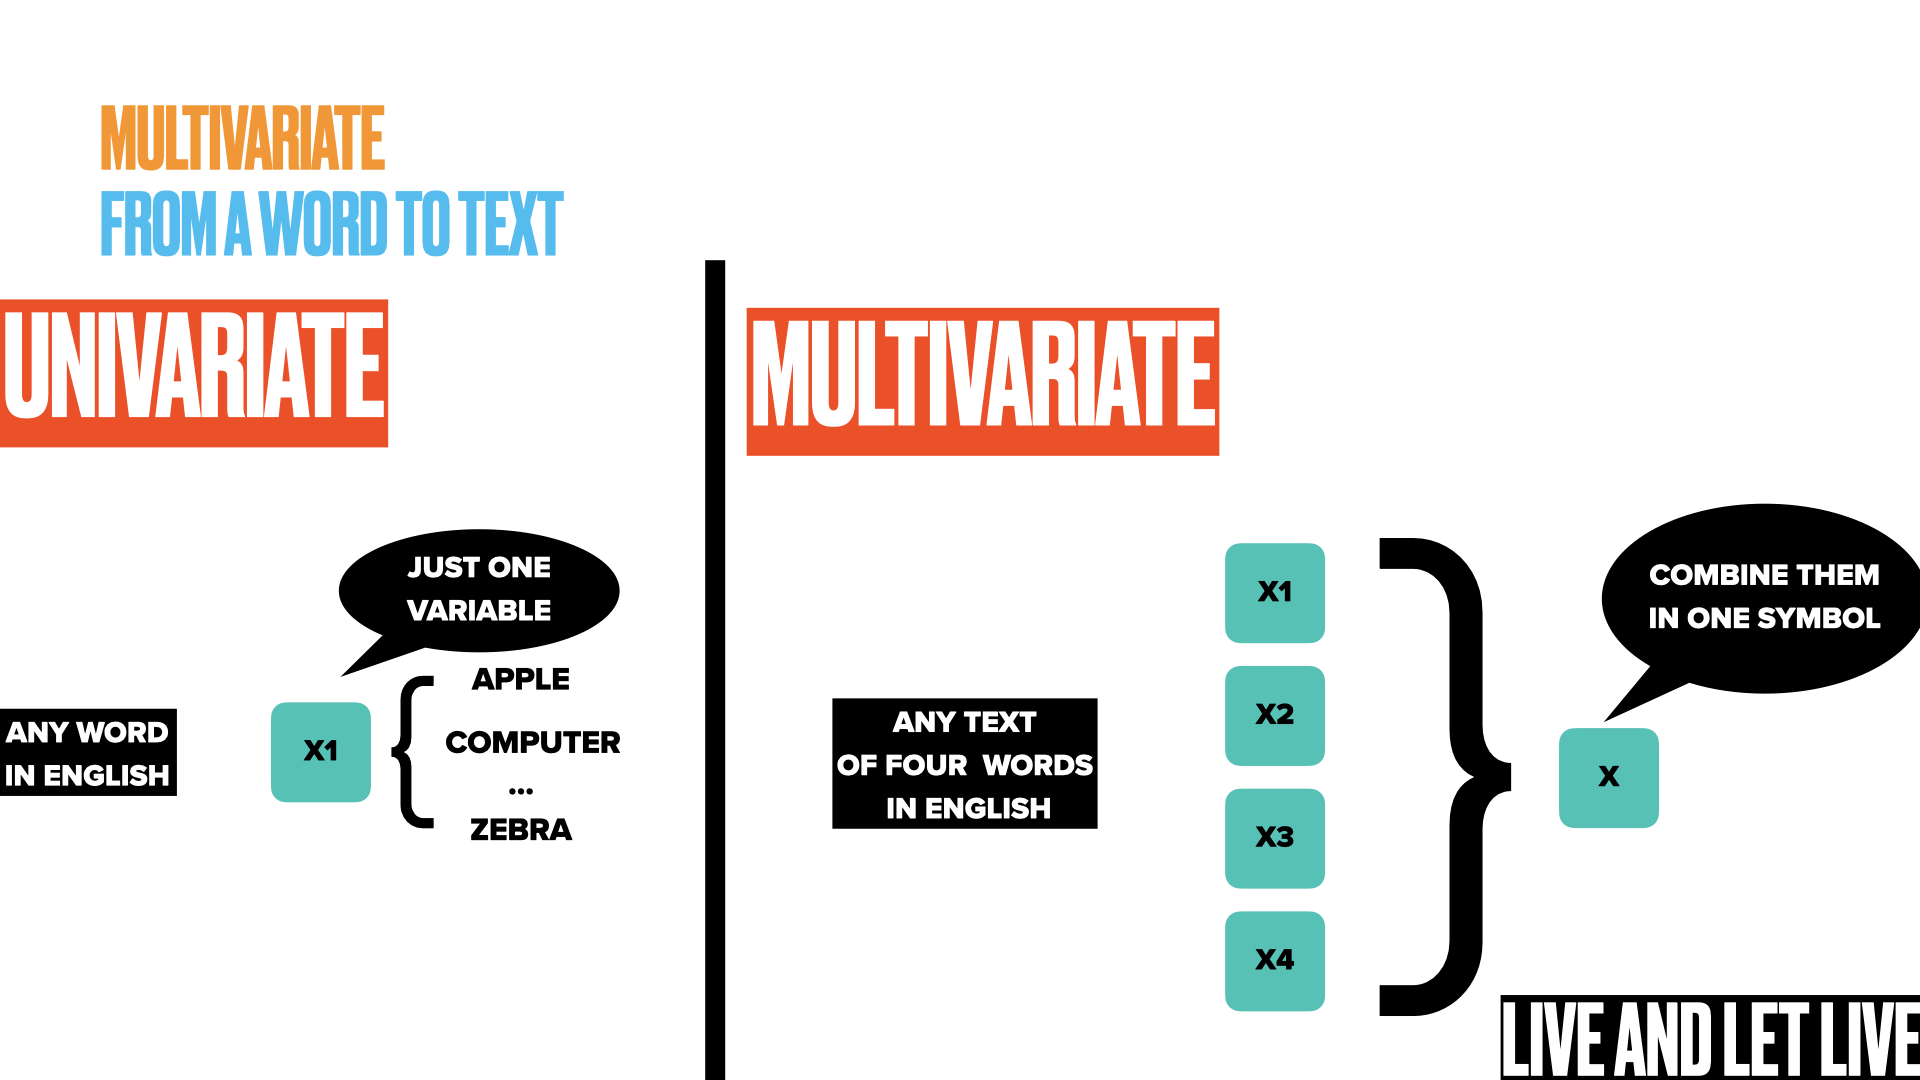

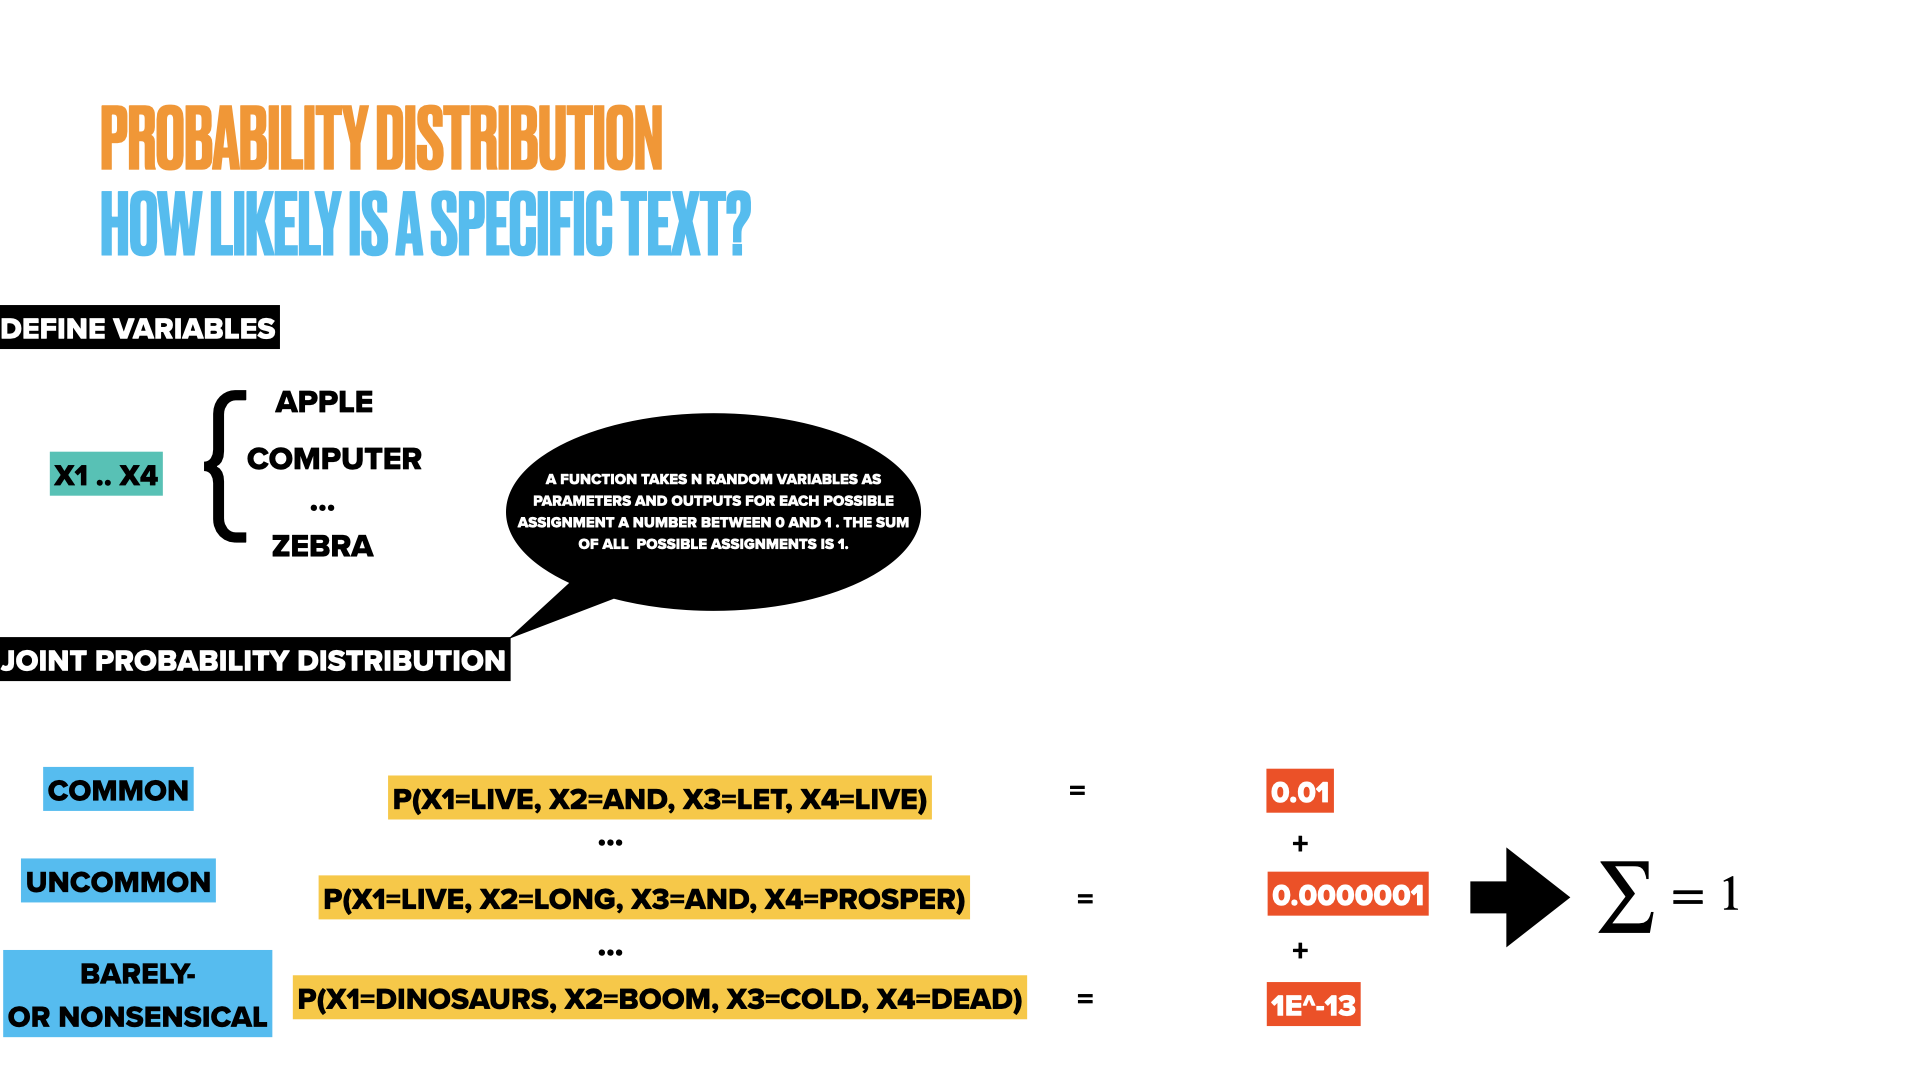

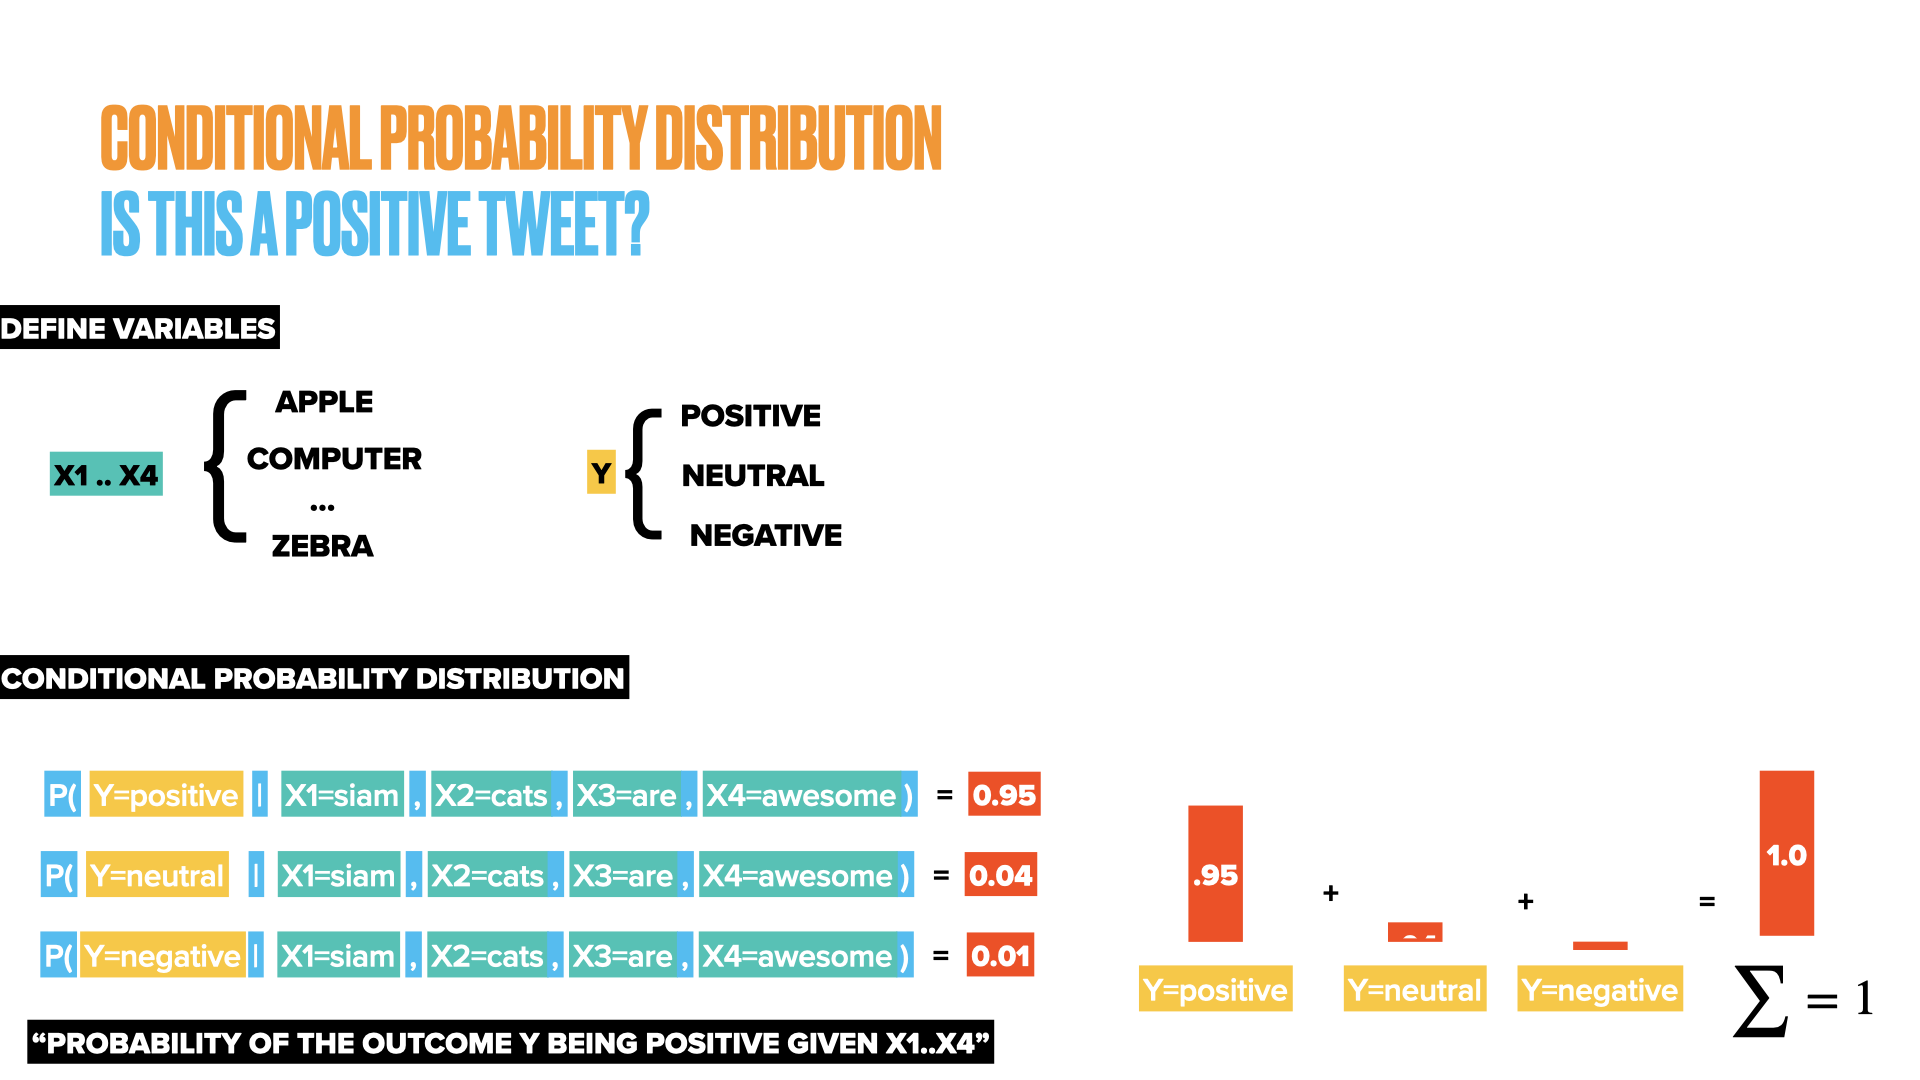

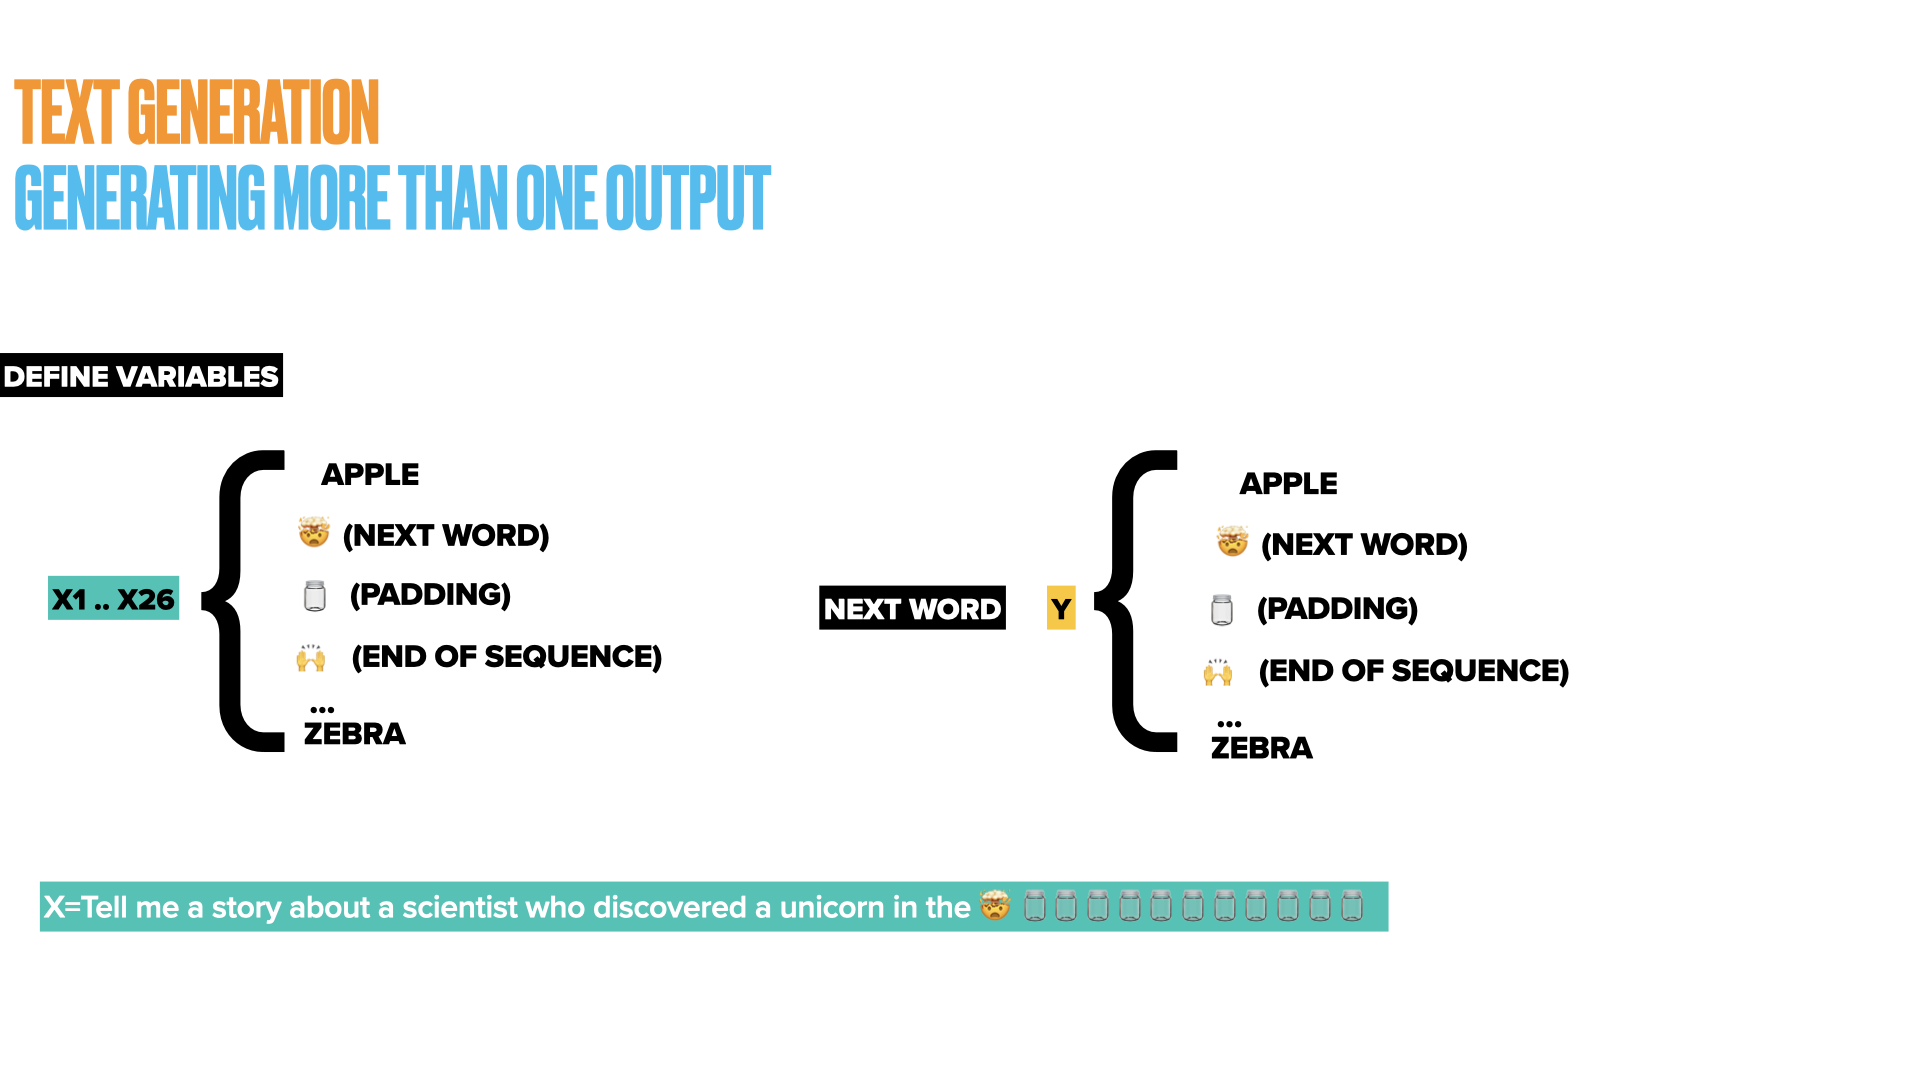

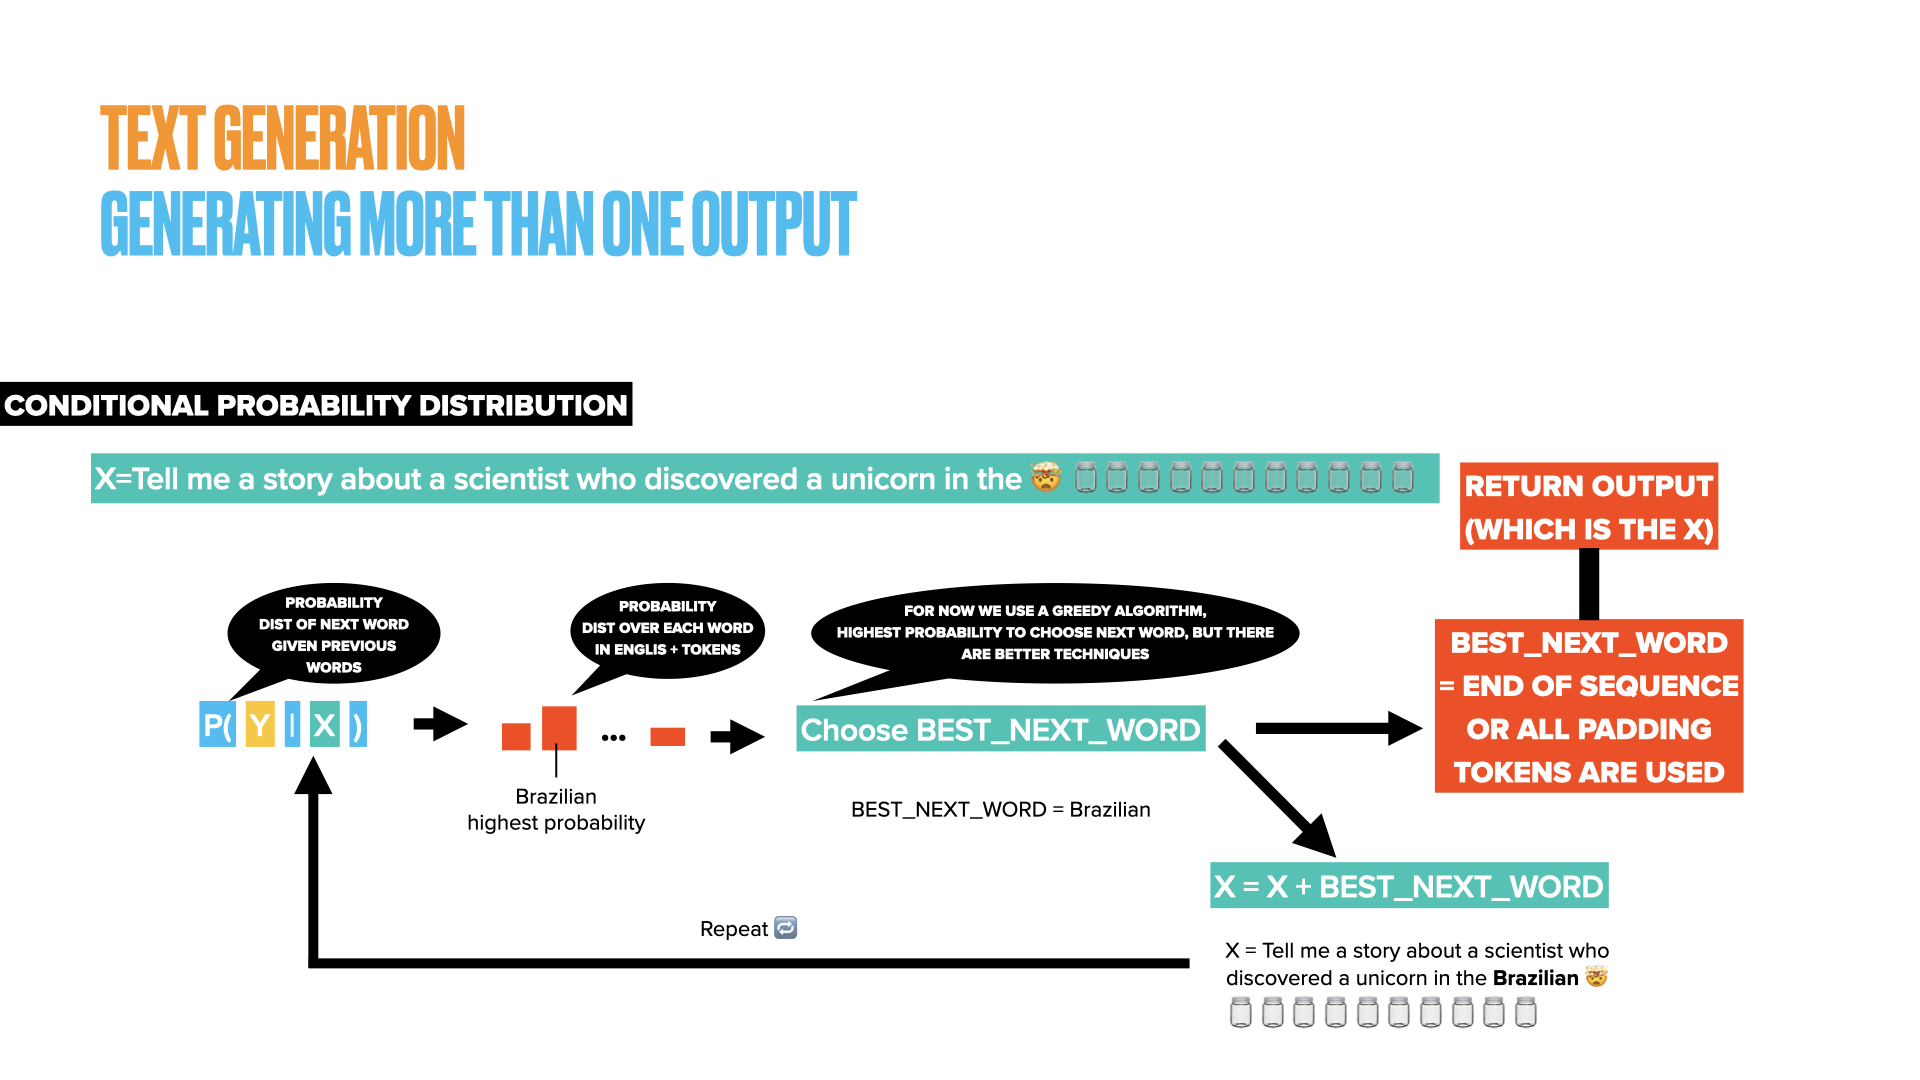

# Practical NLP Tasks

## Classification

* **Inputs**: A string e.g text
* **Outputs**: A label associated with the entire text and a score describing how *certain* the model is about that label

In [ ]:
#@title Try out classification! { vertical-output: true }
from transformers import pipeline

transformer = pipeline("text-classification", model="distilbert-base-uncased-finetuned-sst-2-english")

text = "Hello NLP world!" #@param {type:"string"}
print(transformer(text)[0])

In [ ]:
#@title ## Applied Theory
#@markdown ### Scenario

#@markdown **Input**: Hello NLP world!

#@markdown **Output**: "Positive"(0.9993731379508972) , "Negative"(0.00062686204)



#@markdown ### Apply Theory
input_variate = 'univariate'  #@param ["univariate", "multivariate"]
#@markdown How many ouptut classes do we have? 
ouptut_num = '0'  #@param ["0", "1", "2", "3", "as many as there tokens in the vocabulary"]
#@markdown Try to fill the gaps 

#@markdown P(Y=A | B) = 0.9993731379508972

A = "---" #@param ["---", "negative", "positive"]

B = "---" #@param ["---", "X=Hello NLP!", "X1=Hello; X2=NLP; X3=world!", "X1=Hello, X2=NLP, X3=world!"]

#@markdown P(Y=negative | B) = C
C = "---" #@param ["---", "0.9993731379508972", "0.00062686204"]


#@markdown ---


## Named Entity Recognition (NER)

* **Inputs**: A string e.g text
* **Outputs**: A list of start and positions of *Entities* in the text, as well as a score of how *certain* the model is about these *Entities*.

In [ ]:
#@title Try out NER! { vertical-output: true }
from transformers import pipeline

transformer = pipeline("ner", aggregation_strategy="simple", model="dbmdz/bert-large-cased-finetuned-conll03-english")

text = "George Washington went to Washington to enjoy his favorite snack at Tokyo Sushi: California Rolls" #@param {type:"string"}

for entity in transformer(text):
    print(entity)

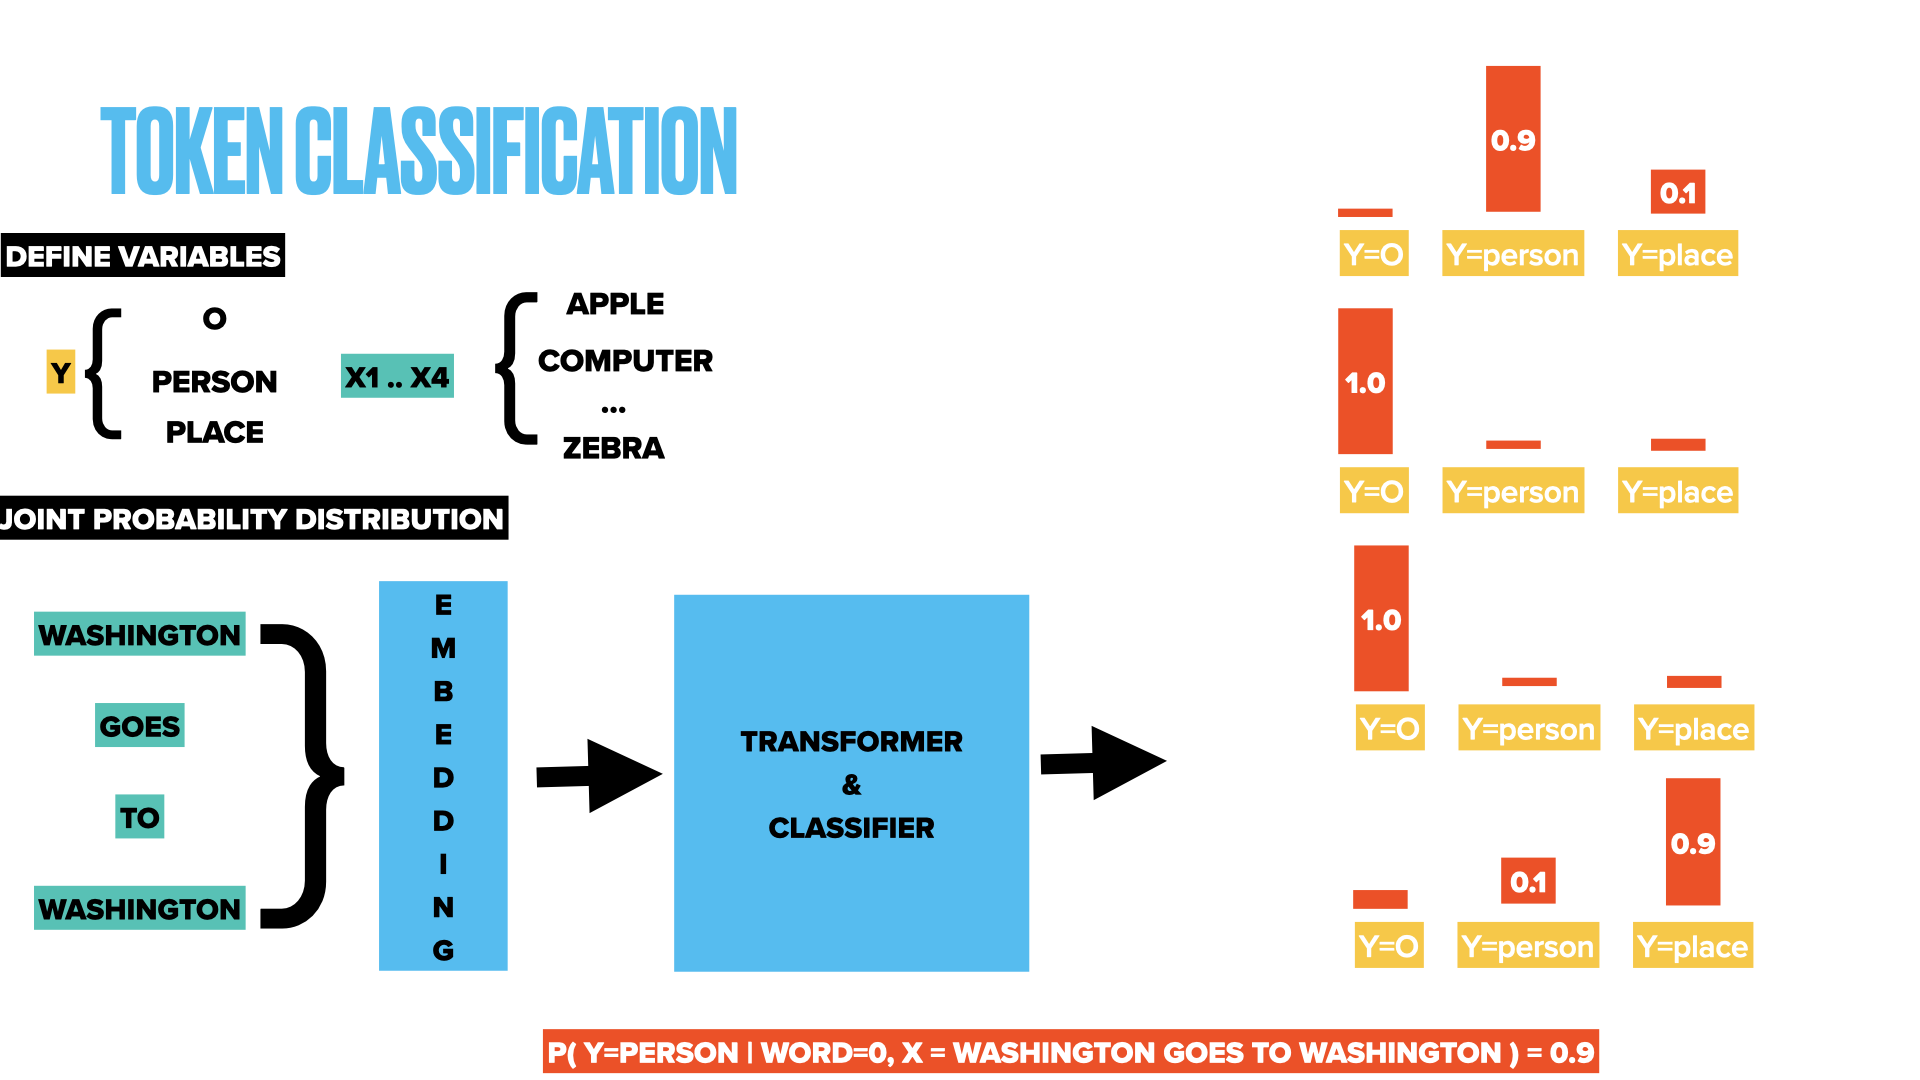

## Question Answering (Citing)

* **Inputs**: A question text and a context text in which we expect an answer
* **Outputs**: Start and end position of the answer inside the context, as well as how *certain* the model is about the answer.

*Formerly known as Exploration Mission-1 (EM-1), the mission was renamed following the creation of the Artemis program. The mission lifted off from Launch Complex 39B at the Kennedy Space Center aboard the Space Launch System rocket. The Orion spacecraft has been launched on a mission of between 26 and 42 days, with at least 6 of those days in a distant retrograde orbit around the Moon.*

https://en.wikipedia.org/w/index.php?title=Artemis_1&oldid=1122607516

In [ ]:
#@title Try out Question Answering! { vertical-output: true }
from transformers import pipeline

transformer = pipeline("question-answering", model="distilbert-base-cased-distilled-squad")

context = "Formerly known as Exploration Mission-1 (EM-1), the mission was renamed following the creation of the Artemis program. The mission lifted off from Launch Complex 39B at the Kennedy Space Center aboard the Space Launch System rocket. The Orion spacecraft has been launched on a mission of between 26 and 42 days, with at least 6 of those days in a distant retrograde orbit around the Moon." #@param {type:"string"}
question = "What's the name of the next moon program?" #@param {type:"string"}

print(transformer(question=question, context=context))

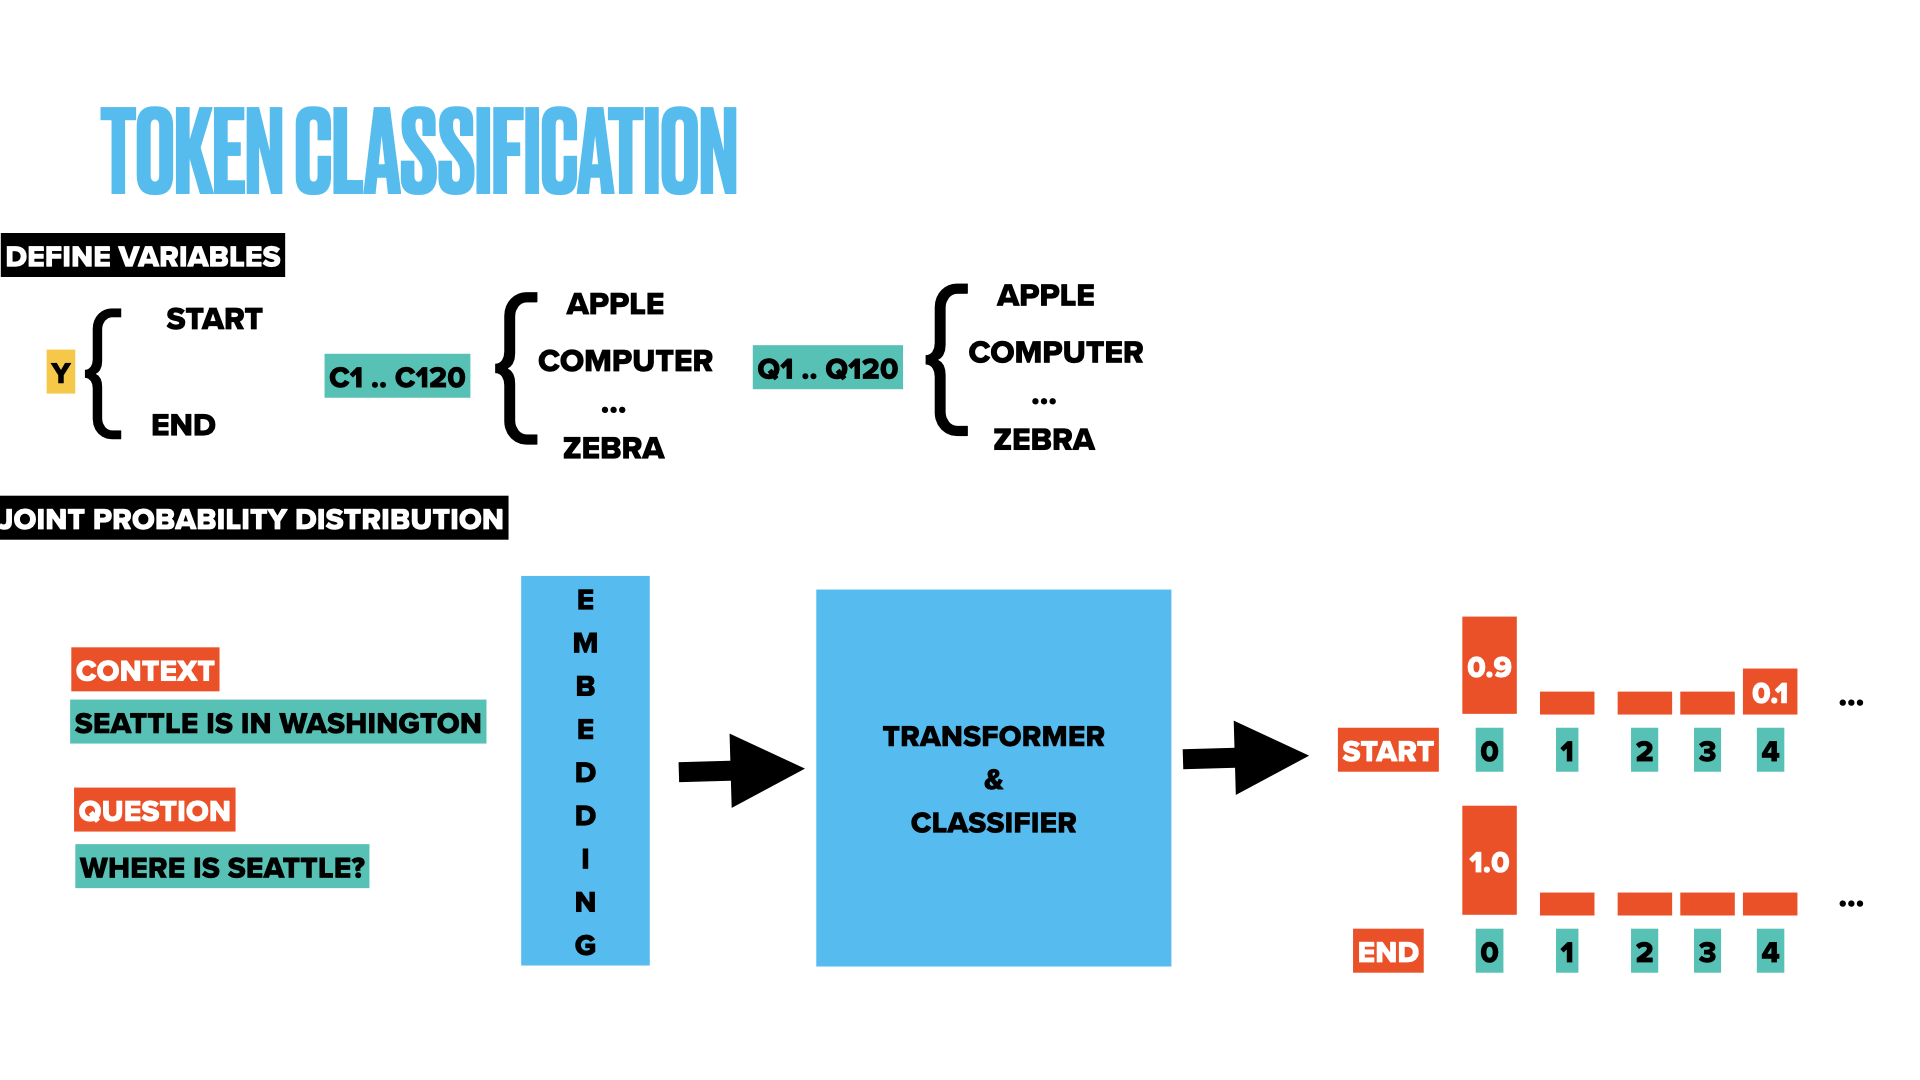

## Summarization

* **Inputs**: A *long* text
* **Outputs**: A *shorter* summary of the input text

*Formerly known as Exploration Mission-1 (EM-1), the mission was renamed following the creation of the Artemis program. The mission lifted off from Launch Complex 39B at the Kennedy Space Center aboard the Space Launch System rocket. The Orion spacecraft has been launched on a mission of between 26 and 42 days, with at least 6 of those days in a distant retrograde orbit around the Moon. After reaching Earth orbit and performing a trans-lunar injection (burn to the Moon), the mission will deploy ten CubeSat satellites. The Orion spacecraft will later enter a distant retrograde orbit for six days.*

https://en.wikipedia.org/w/index.php?title=Artemis_1&oldid=1122607516

In [ ]:
#@title Try out Summarization! { vertical-output: true }
from transformers import pipeline

transformer = pipeline("summarization", model="sshleifer/distilbart-xsum-12-3")

text = "Formerly known as Exploration Mission-1 (EM-1), the mission was renamed following the creation of the Artemis program. The mission lifted off from Launch Complex 39B at the Kennedy Space Center aboard the Space Launch System rocket. The Orion spacecraft has been launched on a mission of between 26 and 42 days, with at least 6 of those days in a distant retrograde orbit around the Moon. After reaching Earth orbit and performing a trans-lunar injection (burn to the Moon), the mission will deploy ten CubeSat satellites. The Orion spacecraft will later enter a distant retrograde orbit for six days." #@param {type:"string"}

print(transformer(text, max_length=40, clean_up_tokenization_spaces=True)[0])

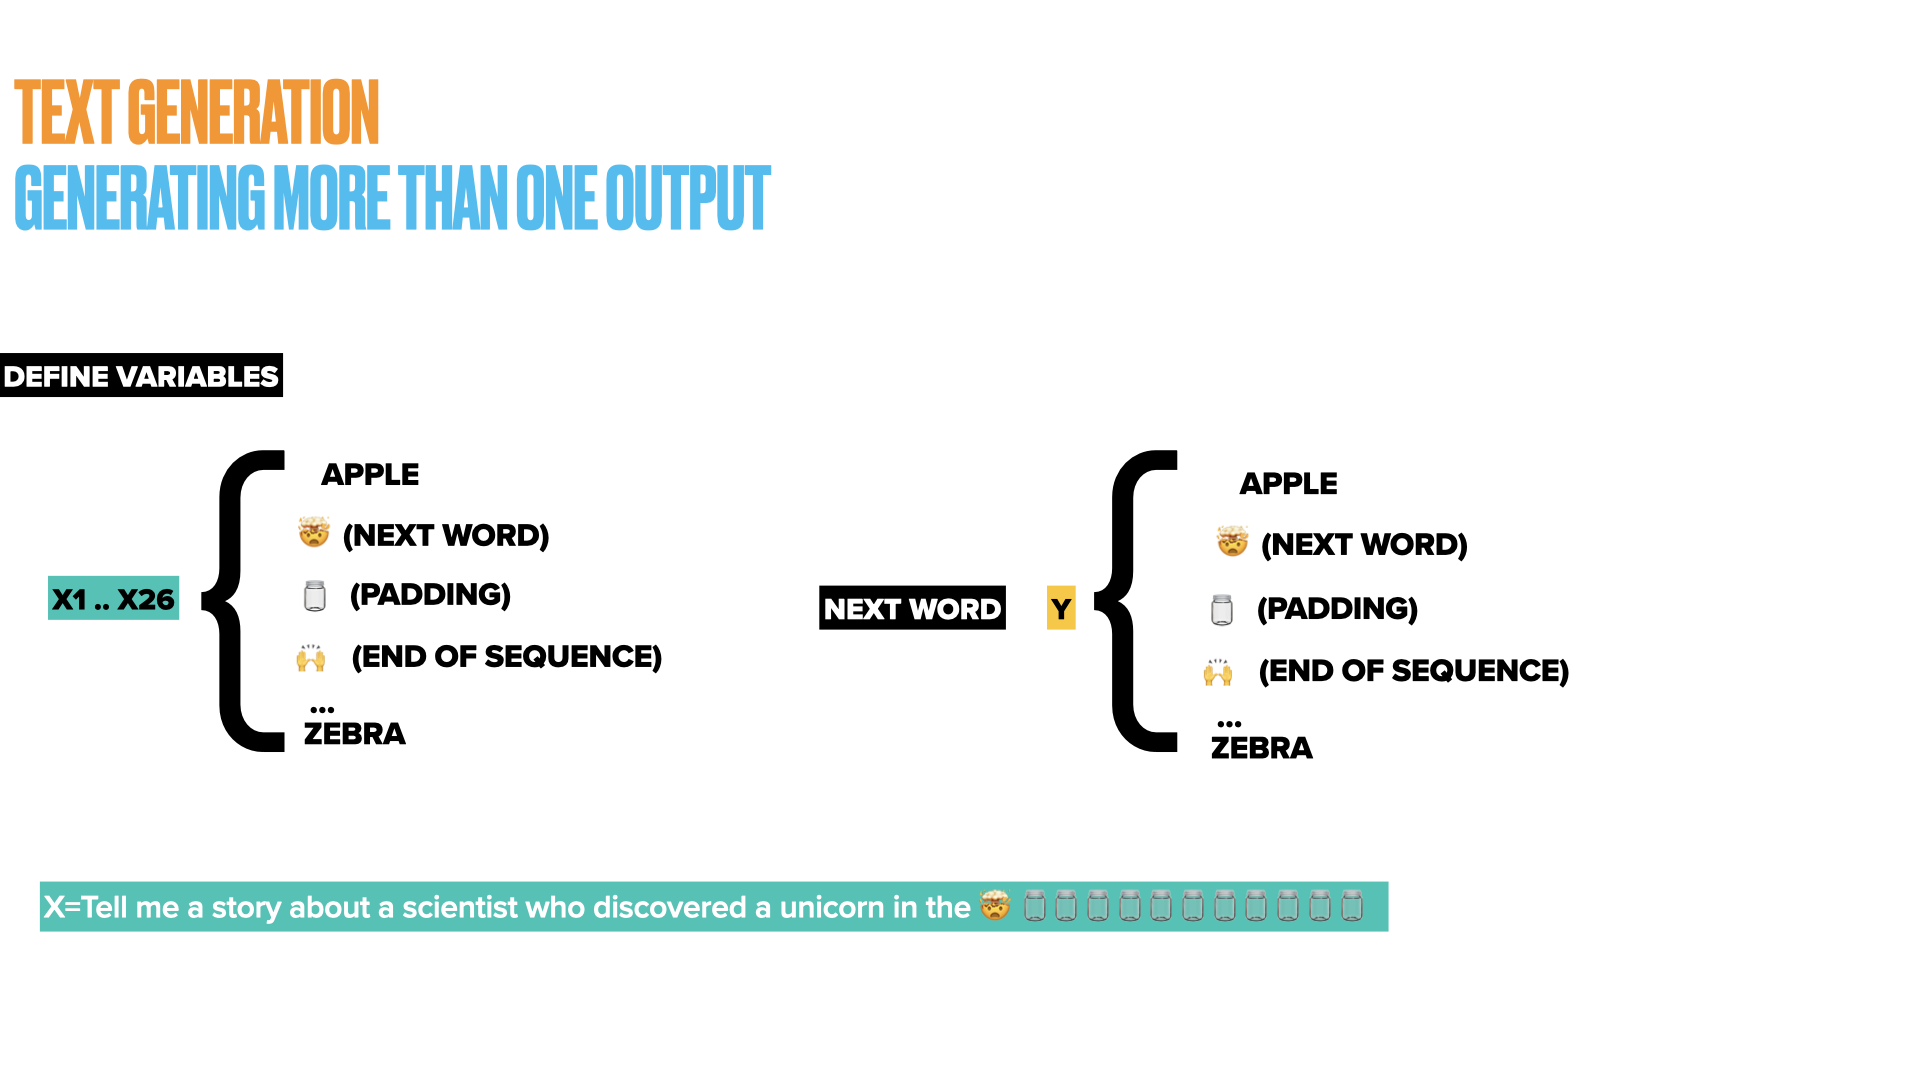

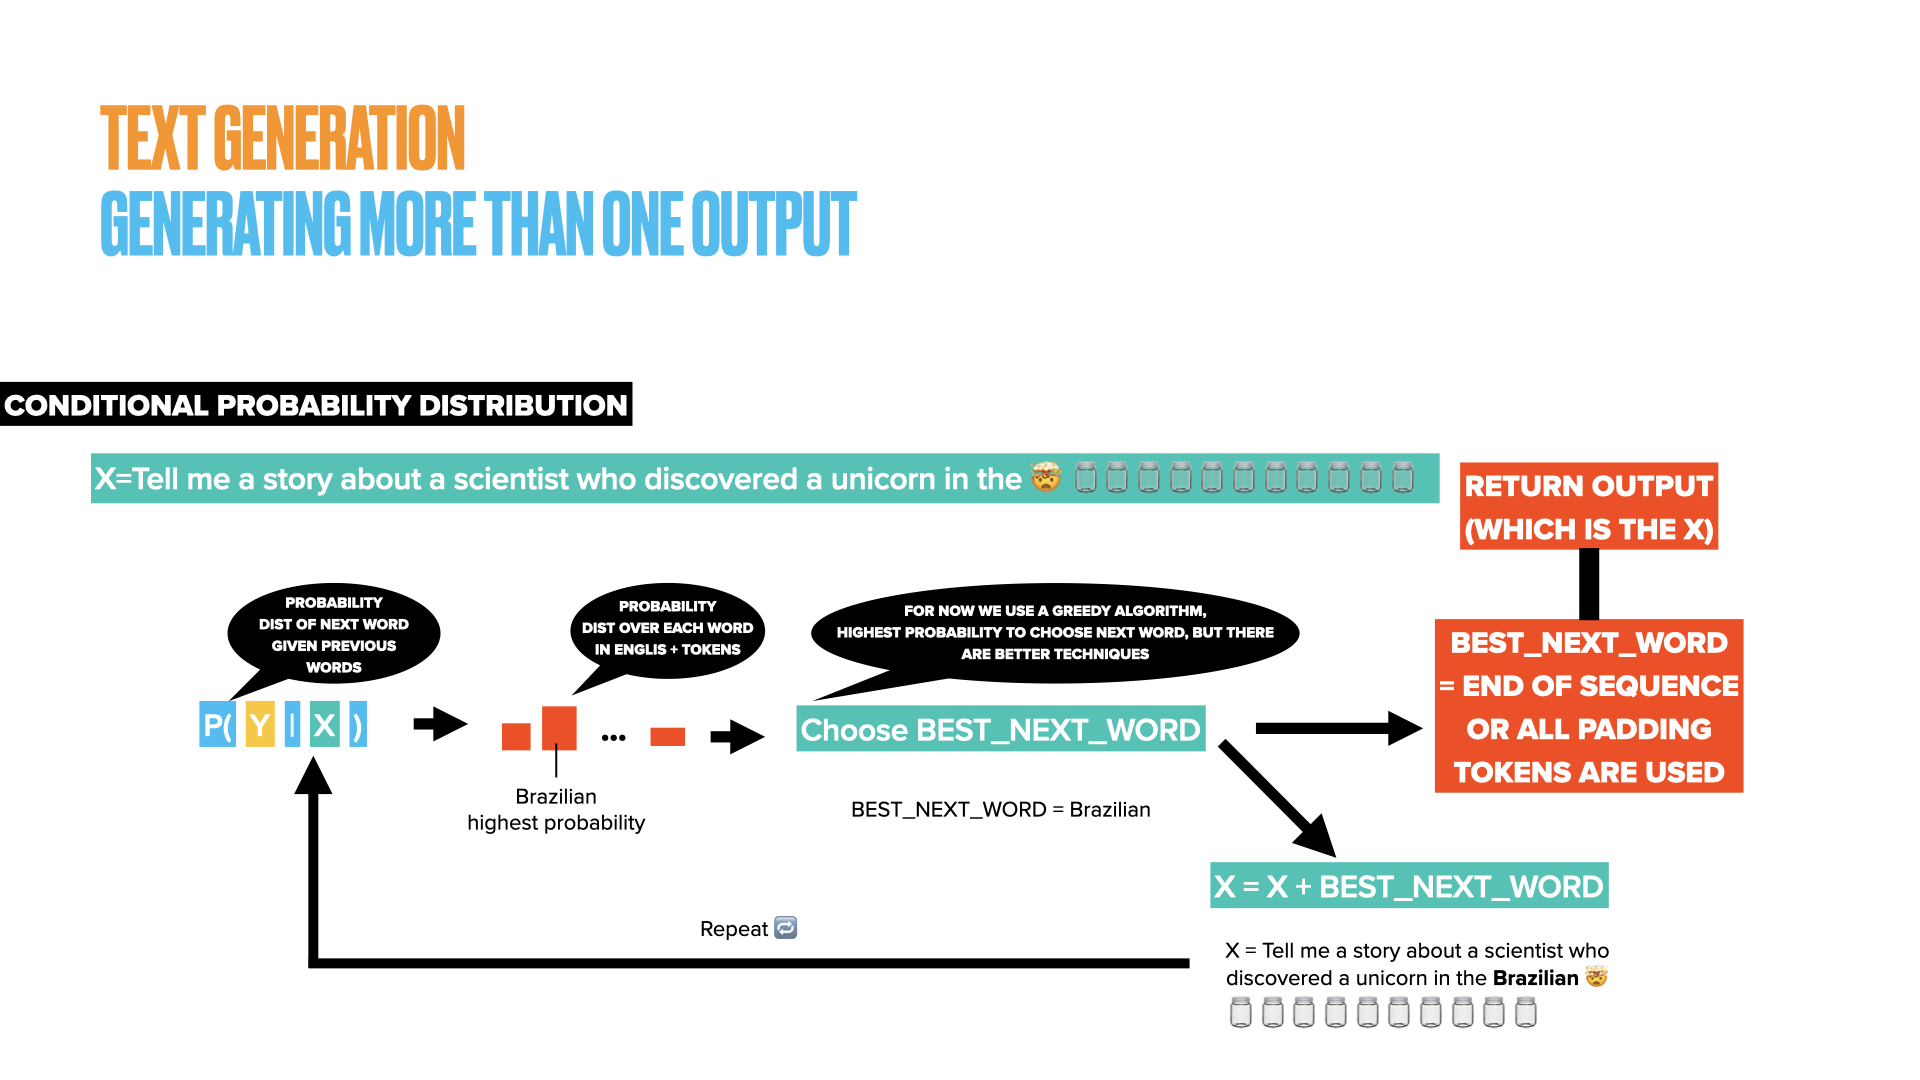

## Translation

* **Inputs**: A text
* **Outputs**: A translation of the input text

*Artemis 1 (también conocida como Artemisa I) es una misión no tripulada programada por la NASA, siendo la primera del programa Artemis y la primera que fue lanzada con el sistema de lanzamiento espacial (SLS) y la nave Orión como carga útil.​ Artemis 1 despegó con éxito desde el Centro Espacial Kennedy el 16 de noviembre de 2022 a las 6:47:44 UTC.*

https://es.wikipedia.org/w/index.php?title=Artemis_1&oldid=147407524

In [ ]:
#@title Try out Translation! { vertical-output: true }
from transformers import pipeline

transformer = pipeline("translation_es_to_en", model="Helsinki-NLP/opus-mt-es-en")

text = "Artemis 1 (también conocida como Artemisa I) es una misión no tripulada programada por la NASA, siendo la primera del programa Artemis y la primera que fue lanzada con el sistema de lanzamiento espacial (SLS) y la nave Orión como carga útil.​ Artemis 1 despegó con éxito desde el Centro Espacial Kennedy el 16 de noviembre de 2022 a las 6:47:44 UTC." #@param {type:"string"}

print(transformer(text, clean_up_tokenization_spaces=True)[0]['translation_text'])

## Text Generation

* **Inputs**: The start of a text or a prompt (which is a start of a text, too)
* **Outputs**: Text that could follow the input text

In [ ]:
#@title Try out Text Generation! { vertical-output: true }
from transformers import pipeline

fast_mode = True #@param {type:"boolean"}
prompt = "What will we find when we explore the universe? " #@param {type:"string"}

if fast_mode:
    transformer = pipeline("text-generation", model='gpt2')
else:
    transformer = pipeline("text-generation", model='EleutherAI/gpt-neo-1.3B')




print(transformer(prompt.strip(), do_sample=True, max_length=100)[0]['generated_text'])

## Word Masking

* **Inputs**: A Text with masked words
* **Outputs:** The input text with the masked words infered

In [ ]:
#@title Try out Word Masking! { vertical-output: true }
from transformers import pipeline

text = "I am beginning to [MASK] NLP. There are so [MASK] things we can do!\"" #@param {type:"string"}

transformer = pipeline('fill-mask', model='bert-base-uncased')

for mask in transformer(text):
    print(mask)

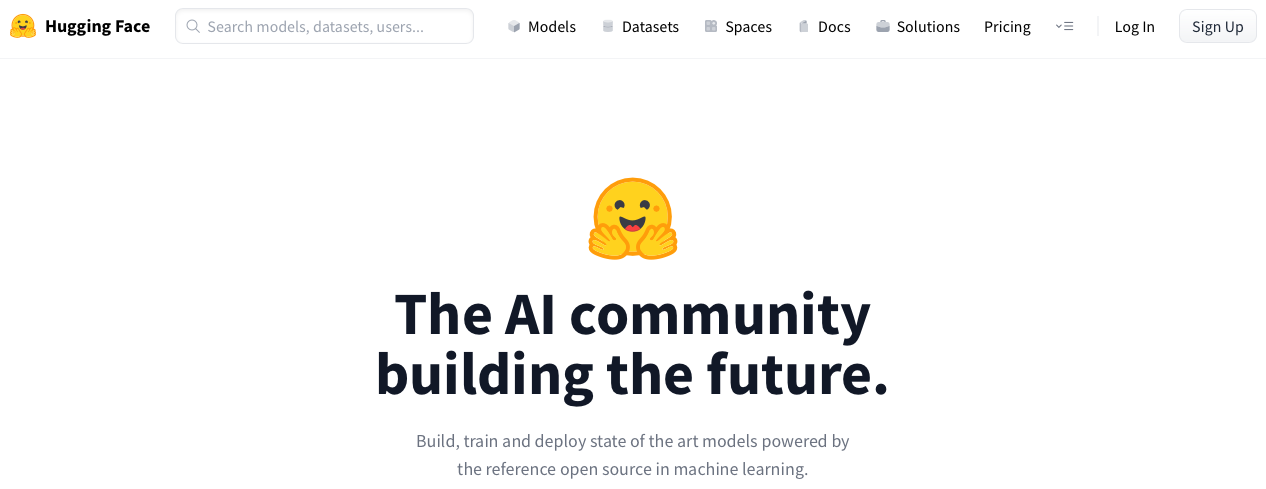



# A Tour of the Hugging Face Library



https://huggingface.co




---



## Hugging Face Hub



1.   [Models](https://huggingface.co/models)
2.   [Datasets](https://huggingface.co/datasets)
3.   [Metrics](https://huggingface.co/metrics)
4.   [Spaces](https://huggingface.co/spaces)
5.   [Docs](https://huggingface.co/docs)



---



## Data Exploration

### The jeopardy dataset

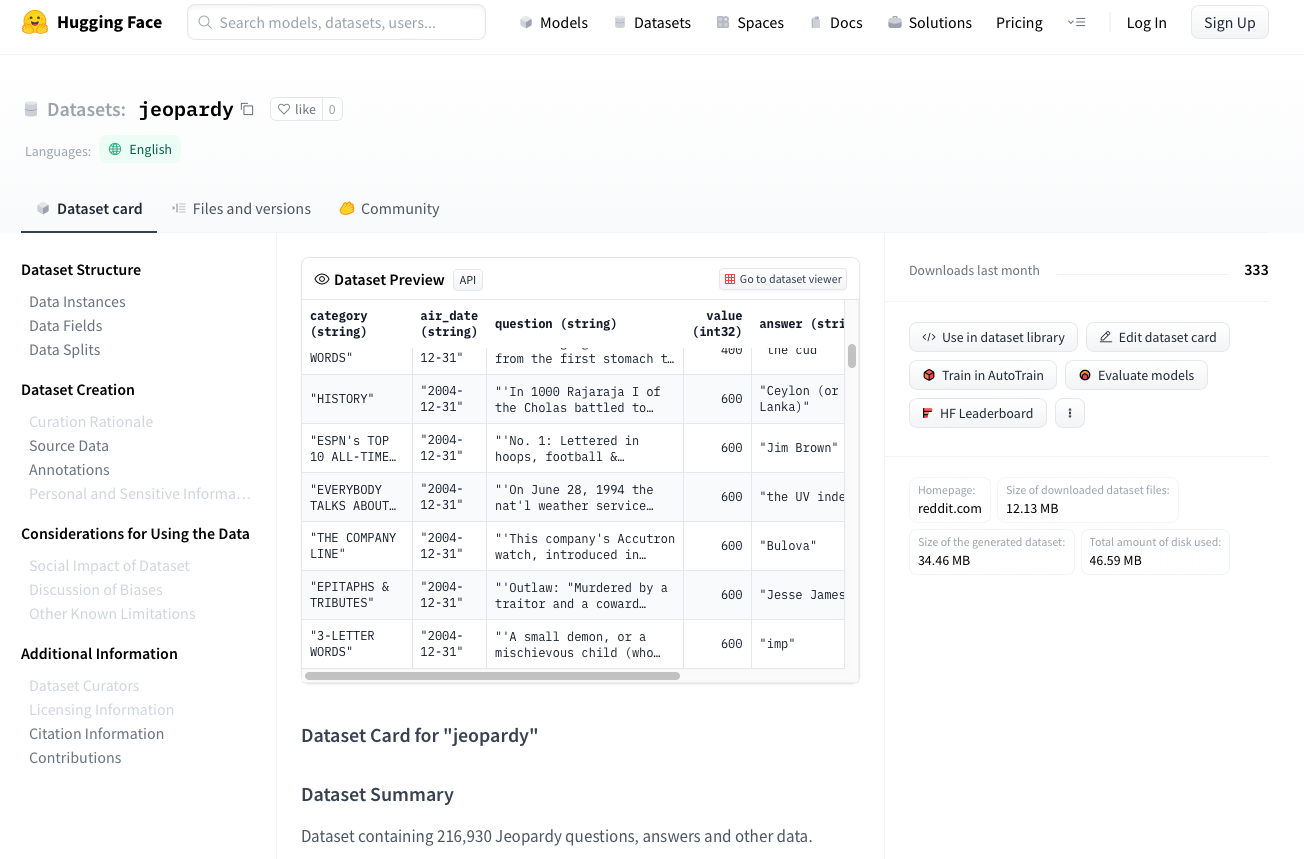

[https://huggingface.co/datasets/jeopardy](https://huggingface.co/datasets/jeopardy)

Let's download the entire datset and inspect the available categories

In [ ]:
from datasets import load_dataset

dataset = load_dataset("jeopardy")

In [ ]:
# Dataset is wrapped in a DatasetDict
# Each entry of a DatasetDict is meant to be a unique slice of a Dataset like "train", "valid", "test"
dataset

In [ ]:
# Let's peek at the categories
dataset["train"]["category"][:10]

In [ ]:
# There are quite a lot of categories, to make things easier we only continue with the top 10
len(set(dataset["train"]["category"]))

In [ ]:
# Converting a Huggingface dataset to pandas is easy 
import pandas as pd


df = pd.DataFrame(dataset["train"])
df

In [ ]:
top10most_common = df["category"].value_counts()[:10].index.tolist()

At this point we might to convert the dataset back to a Huggingface

In [ ]:
# Note, that we do not have to name a split/shard/partition 
# It is assumed that all entries of the DatasetDict are to be processed
dataset = dataset.filter(lambda example: example["category"] in top10most_common)

## Using Models

Let's simple using the pipeline object that has preconfigured data flows thorugh preprocessing, models and psotprocessing for predefined tasks.

A list of all "pipelined" tasks can be found [here](https://huggingface.co/docs/transformers/main_classes/pipelines).

### Zero-Shot Learning

e. g. learning without model training. First, we'll use a predefined pipeline, than we'll put this pipeline together by ourselfs and learn how zero-shot learning is made possible.

In [ ]:
# There is no need to pass a model to the pipeline generator, 
# depending on the task a preselected will be choosen
from transformers import pipeline


zero_shot = pipeline("zero-shot-classification", model="valhalla/distilbart-mnli-12-1")

In [ ]:
idx = 10

question = dataset["train"]["question"][idx].strip("'") + "."
answer = dataset["train"]["answer"][idx].strip("'") + "."
prompt = question + " " + answer
label = dataset["train"]["category"][idx]

print(f"The correct answer is {label}")
zero_shot(prompt, top10most_common)

That preselected idx is impressive but how about a real evaluation?

In [ ]:
import evaluate


accuracy = evaluate.load("accuracy")

In [ ]:
from functools import partial
from tqdm import tqdm
tqdm = partial(tqdm, position=0, leave=True)
# https://stackoverflow.com/questions/41707229/why-is-tqdm-printing-to-a-newline-instead-of-updating-the-same-line

y_true = []
y_pred = []
top_3 = 0 

for example in tqdm(dataset["train"].select(list(range(30)))):
    question = example["question"]
    answer = example["answer"]
    prompt = question + " " + answer
    y_true.append(top10most_common.index(example["category"]))

    outputs = zero_shot(prompt, top10most_common)
    y_pred.append(top10most_common.index(outputs["labels"][0]))
    top_3 += top10most_common.index(example["category"]) in [top10most_common.index(i) for i in outputs["labels"][:3]]

In [ ]:
accuracy.compute(references=y_true, predictions=y_pred)

In [ ]:
top_3 / len(y_true)

### In-Context Learning

Zero-Shot learning is a speical form of In-Context learning in which the language model has to use it's knowledge about semantic distributions to conduct bayesian inference. Assumeing that the pretrained language model has some prior knowledge about distributions we can imagine the prompt as evidence to marginalize the posterior to the concept/category from the prompt.

Let's use this idea to build an In-Context learning pipeline to predict tweet sentiments.

In [ ]:
# First, we load the dataset
from datasets import load_dataset

dataset = load_dataset("emotion", split="train")

In [ ]:
# Emotions are encoded as integers as follows:
emotions = {
    0: "sadness",
    1: "joy",
    2: "love",
    3: "anger",
    4: "fear",
    5: "surprise"
}


dataset[0]

Some of these emotions are hard to distinguish and the labeling is not perfect. We therefore limit the datset to love and anger.

In [ ]:
dataset_filtered = dataset.filter(lambda example: example["label"] in [2, 3])

To perform in-context learning we justhave to create a context that primes the model to make our desired answer the generated text with the highest probability. Let's see how this works...

In [ ]:
context = ""

# We take the first 6 observations as examples and predict the 7th
for example in dataset_filtered.select(list(range(6))):
    context += example['text'] + " --> " + emotions[example['label']] + "\n"

to_predict = dataset_filtered[6]
context += to_predict['text'] + " --> "

print(context)

In [ ]:
# Let's do this step by step - we need a tokenizer and a model
from transformers import GPTNeoForCausalLM, GPT2Tokenizer


tokenizer = GPT2Tokenizer.from_pretrained("EleutherAI/gpt-neo-125M")
model = GPTNeoForCausalLM.from_pretrained("EleutherAI/gpt-neo-125M")

In [ ]:
# Now we can encode text and make predictions

encoded_input = tokenizer(context, return_tensors='pt')
output = model.generate(input_ids=encoded_input["input_ids"], 
                        do_sample=True,
                        temperature=0.9,
                        max_length=100)

In [ ]:
generated = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated)